In [4]:
from IPython.display import Image
import IPython.display as display
# import plotting package and numerical python package for use in examples later
import matplotlib.pyplot as plt
# make the plots happen inline
%matplotlib inline  
# import the numpy array handling library
import numpy as np

### Introduce Simple Equations
[simple-equations]:(#Simple-Equations)

If we consider waves in the absence of the earth’s rotation, $f=0$,
which implies $v=0$ and we get
<div id='lab7:sec:simple_eq1'>
$$\frac{\partial u}{\partial t} = -g\frac{\partial h}{\partial x}$$
</div><div id='lab7:sec:simple_eq2'>
$$\frac{\partial h}{\partial t} + H\frac{\partial u}{\partial x} = 0$$
</div>

These simplified equations give shallow water gravity waves. For
example, a solution is a simple sinusoidal wave:
<div id='lab7:sec:hwave'>
(wave solution- h)
$$h = h_{0}\cos{(kx - \omega t)}$$
</div><div id='lab7:sec:uwave'>
(wave solution- u)
$$u = \frac{h_{0}\omega}{kH}\cos{(kx - \omega t)}$$ 
</div>
where $h_{0}$ is the amplitude, $k$ is the
wavenumber and $\omega$ is the frequency (See [Cushman-Roisin, 1994](#Ref:Cushman-Roisin) for a nice
review of waves in Appendix A).

Substitution of ([wave solution- h](#lab7:sec:hwave)) and ([wave solution- u](#lab7:sec:uwave)) back into
the differential equations gives a relation between $\omega$ and k.
Confirm that 
<div id='lab7:eq:disp'>
(Analytic Dispersion Relation)
$$\omega^2 = gHk^2,$$
</div>
which is the dispersion relation for these waves.

## Numerical Solution

### Simple Equations
[simple-equations]:(#Simple-Equations)

Consider first the simple equations with $f = 0$. In order to solve
these equations numerically, we need to discretize in 2 dimensions, one
in space and one in time. Consider first the most obvious choice, shown
in Figure [Unstaggered Grid](#lab7:fig:nonstagger).

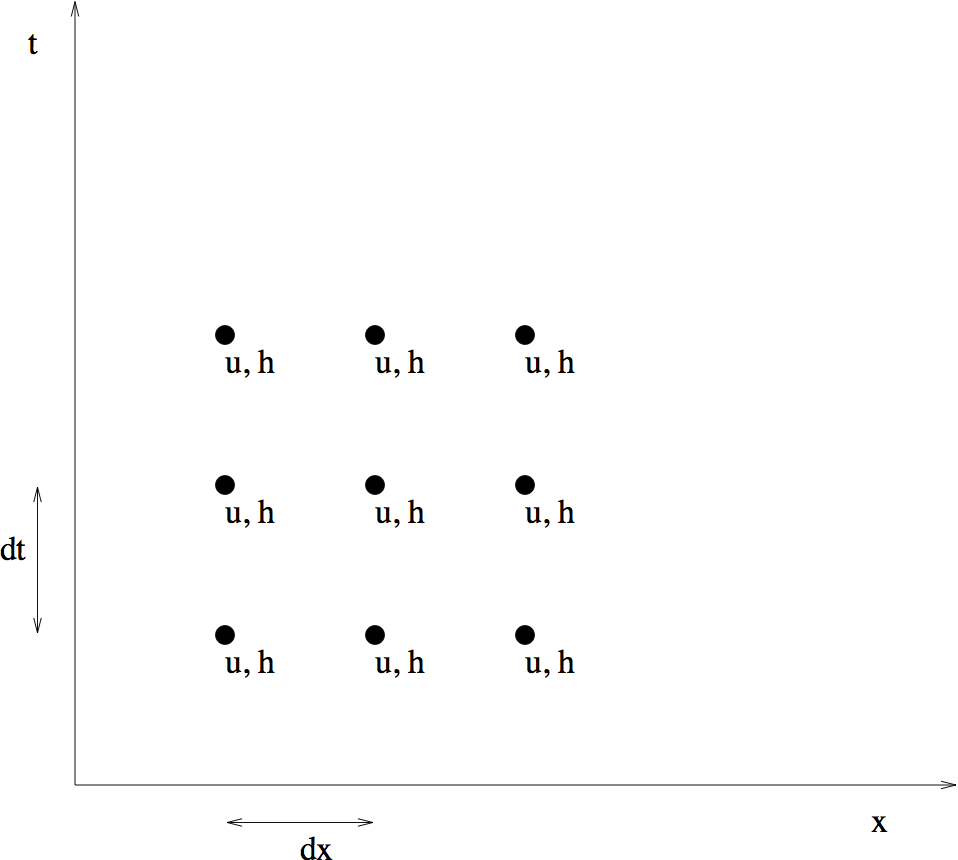

In [4]:
Image(filename='images/nonstagger.png',width='40%') 

<div id='lab7:fig:nonstagger'>
<b>Figure Unstaggered Grid.</b>
</div>

We will use centred difference schemes in both $x$ and $t$. The
equations become:
<div id='lab7:eq:nonstaggerGrid1'>
(Non-staggered, Eqn One)
$$\frac {u(t+dt, x)-u(t-dt, x)}{2 dt} + g \frac {h(t, x+dx) - h(t, x-dx)}{2dx} = 0$$
</div><div id='lab7:eq:nonstaggerGrid2'>
(Non-staggered, Eqn Two)
$$\frac {h(t+dt, x)-h(t-dt, x)}{2 dt} + H \frac {u(t, x+dx) - u(t, x-dx)}{2dx} = 0$$
</div>
We can rearrange these equations to
give $u(t+dt, x)$ and $h(t+dt, x)$. For a small number of points, the
resulting problem is simple enough to solve in a notebook.

# Stability #

Below is the original derivation of stability for the staggered grid.  Today's worksheet is to modify this analysis for the unstaggered grid (shown above).  Note that this means you are moving the "h" points to be co-located with the "u" points (not 1/2 dx away).

## Staggered ##
Mathematically, consider the equations ([Staggered, Eqn 1](#lab7:eq:staggerGrid1)) and
([Staggered, Eqn 2](#lab7:eq:staggerGrid2)). Let $x=md$ and $t=p\, dt$ and consider a
solution 
<div id='eq:udis'>
(u-solution)
$$\begin{aligned}
u_{mp} &=& {\cal R}e \{ {\cal U} \exp [i(kx - \omega t)] \}\\
&=& {\cal R}e \{ {\cal U} \exp [i(kmd - \omega p\, dt)] \} \nonumber\end{aligned}$$
$$\begin{aligned}
h_{mp} &=& {\cal R}e \{ {\cal H} \exp [i(k[x - dx/2] - \omega t)] \}\\
&=& {\cal R}e \{ {\cal H} \exp [i(k[m - 1/2]d - \omega p\, dt)] \} \nonumber\end{aligned}$$
where ${\cal R}e$ means take the real part and ${\cal U}$ and ${\cal H}$
are constants. 

## Unstaggered ##

*Your answer here*

(Hint: copy the text from the cell above and just modify it)

## Staggered ##

Substitution into ([Staggered, Eqn 1](#lab7:eq:staggerGrid1)) and
([Staggered, Eqn 2](#lab7:eq:staggerGrid2)) gives two algebraic equations in ${\cal U}$
and ${\cal H}$ which can be written: 
$$\left[
\begin{array}{cc} - \sin(\omega dt)/ dt & 2 g \sin(kd/2)/d \\
2 H \sin(kd/2)/d &  -\sin(\omega \, dt)/ dt \\
\end{array}
\right]
\left[
\begin{array}{c} {\cal U}\\ {\cal H}\\ 
\end{array} \right]
= 0.$$ 
</div>
where $\exp(ikd)-\exp(-ikd)$ has been written $2 i \sin(kd)$ etc.

## Unstaggered ##

*Your answer here*

## Staggered ##
In order for there to be a non-trivial solution, the determinant of the
matrix must be zero. This determinant gives the dispersion relation
<div id='lab7:eq:numerDisp'>
(Numerical Dispersion Relation)
$$ \frac{\sin^2(\omega \, dt)}{dt^2} = 4 gH \frac {\sin^2(kd/2)}{d^2}$$
</div>
Which can be compared to the ([Analytic Dispersion Relation](#lab7:eq:disp)), the “real” dispersion
relation. 

## Unstaggered ##

*Your answer here*

## Staggered ##

In particular, if we decrease both the time step and the space
step, $dt \rightarrow 0$ and $d \rightarrow 0$, 
([Numerical Dispersion Relation](#lab7:eq:numerDisp))
approaches ([Analytic Dispersion Relation](#lab7:eq:disp)). The effect of just the discretization in
space can be found by letting just $dt \rightarrow 0$ which gives
<div id='lab7:eq:numerDispSpace'>
(Continuous Time, Discretized Space Dispersion Relation)
$$\omega^2 = 4 gH \frac {\sin^2(kd/2)}{d^2}$$
</div>

## Unstaggered ##

*Your answer here*

## Staggered ##

The “real” dispersion relation, ([Analytic Dispersion Relation](#lab7:eq:disp)), and the numerical
dispersion relation with continuous time,
([Continuous Time, Discretized Space Dispersion Relation](#lab7:eq:numerDispSpace)), both give $\omega^2$ positive and
therefore $\omega$ real. However, this is not necessarily true for the
numerical dispersion relation ([Numerical Dispersion Relation](#lab7:eq:numerDisp)). What does a
complex $\omega$ mean? Well, go back to ([u-solution](#eq:udis)). A complex
$\omega = a + ib$ gives $u \propto \exp(-iat)\exp(bt)$. The first
exponential is oscillatory (like a wave) but the second gives
exponential growth if $b$ is positive or exponential decay if $b$ is
negative. Obviously, for a stable solution we must have $b \le 0$. So,
using ([Numerical Dispersion Relation](#lab7:eq:numerDisp)) we must find $\omega$ and determine if it
is real.

Now, because ([Numerical Dispersion Relation](#lab7:eq:numerDisp)) is a transcendental equation, how
to determine $\omega$ is not obvious. The following works:

-   Re-expand $\sin(\omega\,dt)$ as
    $(\exp(i \omega\,dt)-\exp(-i\omega\,dt))/2i$.

-   Write $\exp(-i\omega\,dt)$ as $\lambda$ and note that this implies
    $\exp(i\omega\, dt) = 1/\lambda$. If $\omega dt = a + ib$ then
    $b =  ln |\lambda|$. For stability the magnitude of $\lambda$ must
    be less than one.

-   Write $4 gH \sin^2(kd/2)/d^2$ as $q^2$, for brevity.

## Unstaggered ##

*Your answer here*. 
Important difference will be the definition of q$^2$

## Staggered ##
-   Substitute in ([Numerical Dispersion Relation](#lab7:eq:numerDisp)) which gives:
    $$-(\lambda-1/\lambda)^2 = 4 q^2 dt^2$$ 
    or
    $$\lambda^4 - 2 (1 - 2 q^2 dt^2) \lambda^2 + 1 = 0$$ 
    or
    <div id='lab7:eq:lambda'>
    (Lambda Eqn)
    $$\lambda = \pm \left(1-2q^2 dt^2 \pm 2 q dt \left( q^2
        dt^2 - 1 \right)^{1/2} \right)^{1/2}$$ 
    </div>

## Unstaggered ##

*Your answer here* It should look very similar to the staggered if you have chosen q well.

A plot of the four roots for $\lambda$ is shown below in
Figure [Roots](#lab7:fig:allmag).

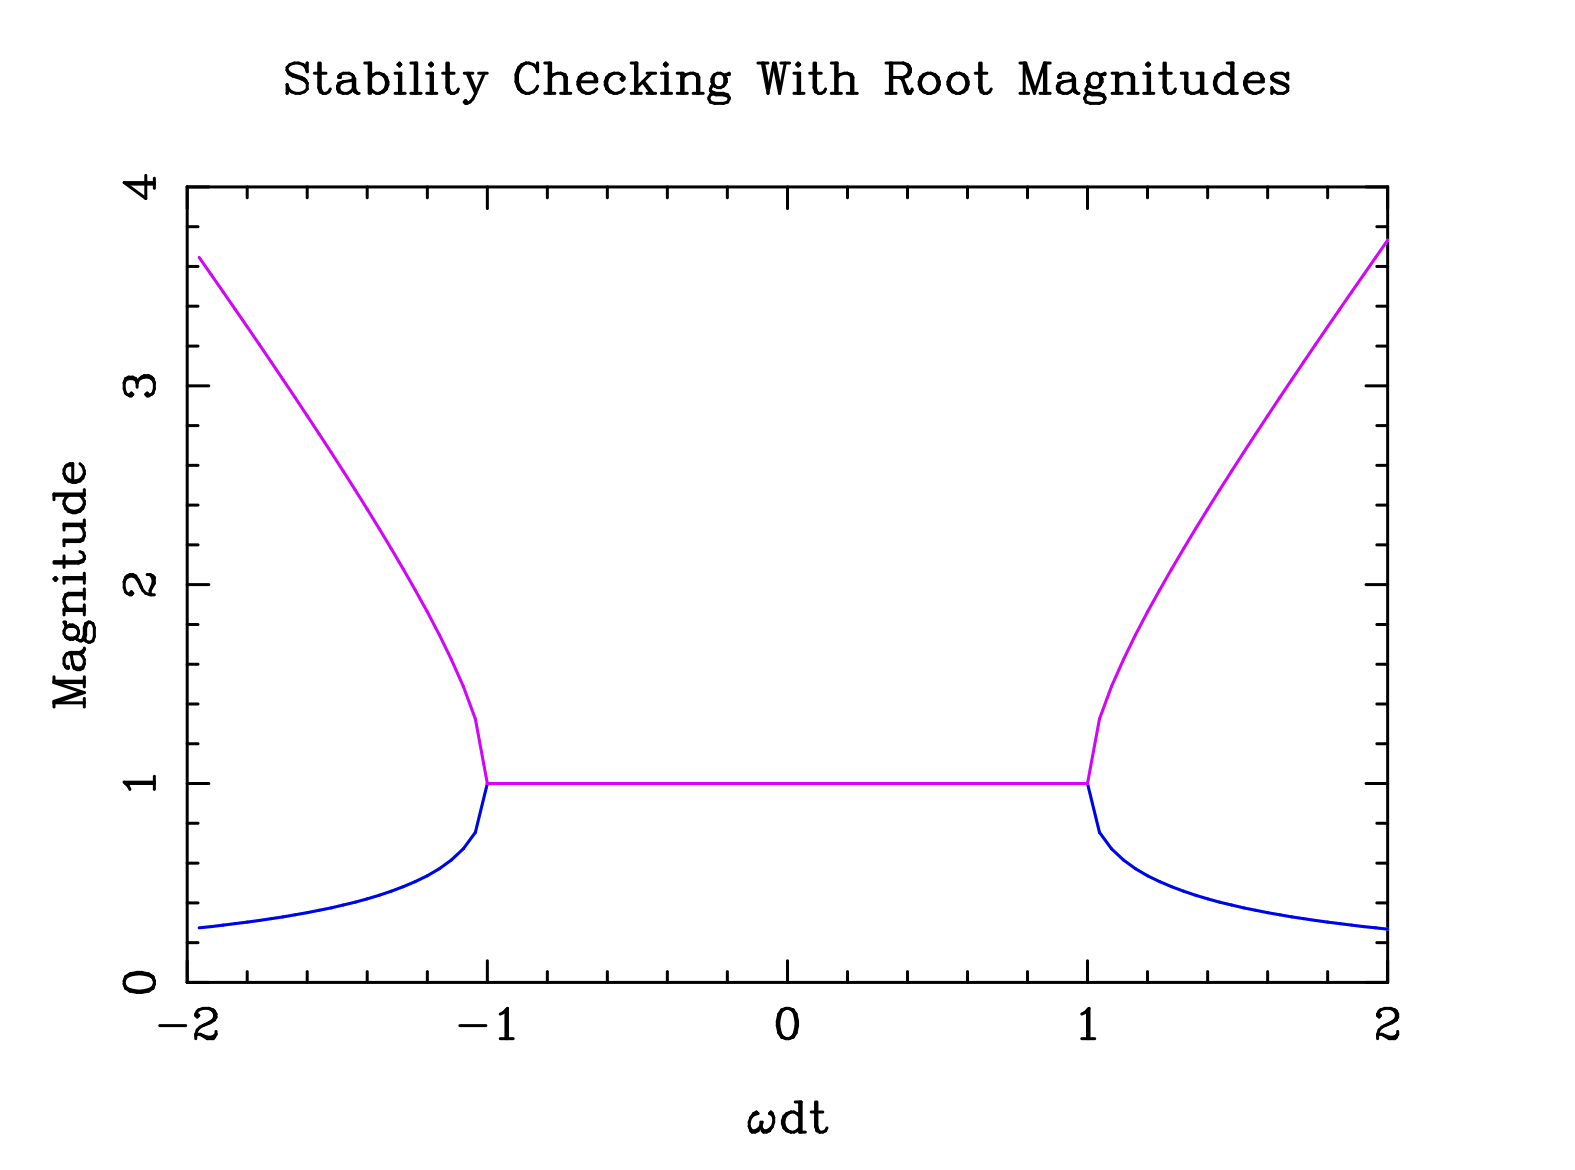

In [5]:
Image(filename='allmag.png',width='45%') 

<div id='lab7:fig:allmag'>
<b>Figure Roots</b>: Magnitude of the four roots of $\lambda$ as a function of $q dt$ (not
$\omega dt$).
</div>

The four roots correspond to the “real” waves travelling to the right
and left, as well two *computational modes* (see
Section [Computational Mode](#Computational-Mode) for more information). The plots for
the four roots overlap, so it is most helpful to view [separate plots for each of the roots](#lab7:fig:sepmag). 

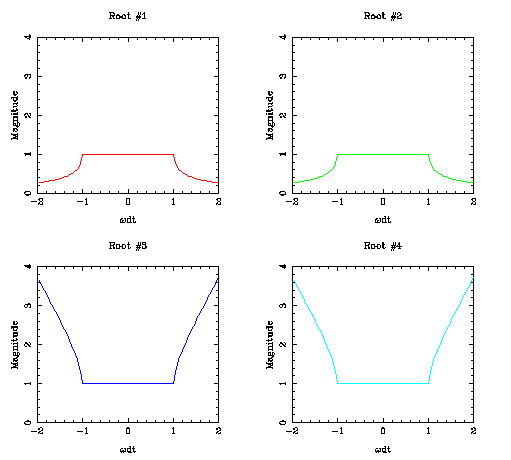

In [7]:
Image(filename='multimag.png',width='60%') 

<div id='lab7:fig:sepmag'>
<b>Figure Separate Roots</b>: Magnitude of the four roots of $\lambda$ as a function of $q dt$ (not $\omega dt$).
</div>

## Staggered ##

Now for stability
$\lambda$ must have a magnitude less than or equal to one. From
Figure [Separate Roots](#lab7:fig:sepmag), it is easy to see that this is the same as
requiring that $|q dt|$ be less than 1.0.

Substituting for $q$
$$1 > q^2 dt^2 =  \frac {4gH}{d^2} \sin^2(kd/2) dt^2$$ 
for all $k$.

## Unstaggered ##

*Your answer here*

## Staggered ##
The maximum wavenumber that can be resolved by a grid of size $d$ is
$k = \pi/d$. At this wavenumber, the sine takes its maximum value of 1.
So the time step 
<div id='lab7:eq:dt'>
$$dt^2 < \frac { d^2}{4 g H}$$
</div>

For this case ($f = 0$) the ratio of the space step to the time step
must be greater than the wave speed $\sqrt
{gH}$, or $$d / dt > 2  \sqrt{gH}.$$ This stability condition is known
as **the CFL condition** (named after Courant, Friedrich and Levy).

## Unstaggered ##
*Your answer here*

Problem 2b:  You just completed this one.


b) Find the CFL condition (in seconds) for $dt$ for the Python
example in *rain.py*, ie., for the non-staggered grid. 